# Regressão Linear - Projeto

Uma empresa de comércio eletrônico com sede na cidade de Nova York que vende roupas online, mas também tem sessões de consultoria em estilo e vestuário na loja. Os clientes entram na loja, têm sessões / reuniões com um estilista pessoal, então podem ir para casa e encomendarem em um aplicativo móvel ou site para a roupa que desejam. A empresa está tentando decidir se deve concentrar seus esforços em sua experiência em aplicativos móveis ou em seu site.


## Imports

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

%matplotlib inline

## Obter dados

** Resumo dos dados **

* Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
* Time on App: tempo médio gasto no app em minutos.
* Time on Website: tempo médio gasto no site em minutos.
* Lenght of Membership: Há quantos anos o cliente é membro.

In [17]:
clientes = pd.read_csv("Ecommerce Customers")

In [18]:
clientes.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [19]:
clientes.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [20]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Análise exploratória de dados

___
** Usand seaborn para criar um jointplot para comparar as colunas Time On Website e Volume anual para visualizar possíveis correlações **

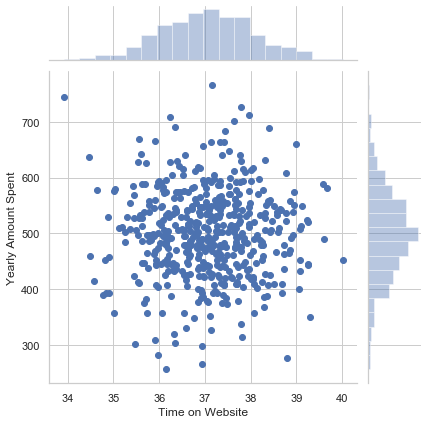

In [21]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=clientes)

** Aparentemente não existe correlação **

** Farei o mesmo com Time on App. **

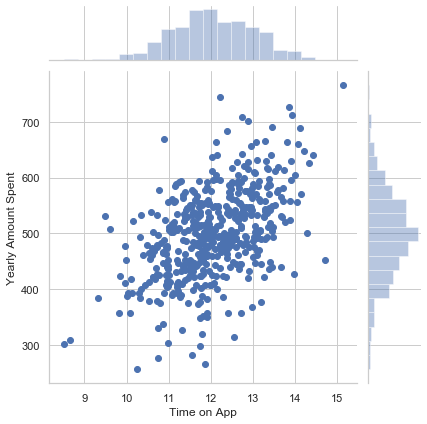

In [22]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=clientes)

** Parece haver uma correlação linear **

** Usando jointplot para criar um lote de caixa hexagonal 2D que compara tempo no aplicativo (Time on App) e o tempo da associação (Length of Membership). **

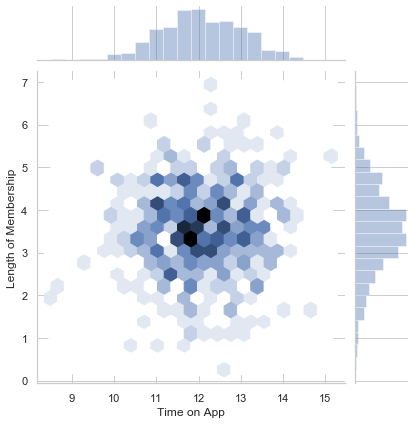

In [23]:
sns.jointplot(x='Time on App', y='Length of Membership', data=clientes, kind='hex')

** Verificando todas as relações **

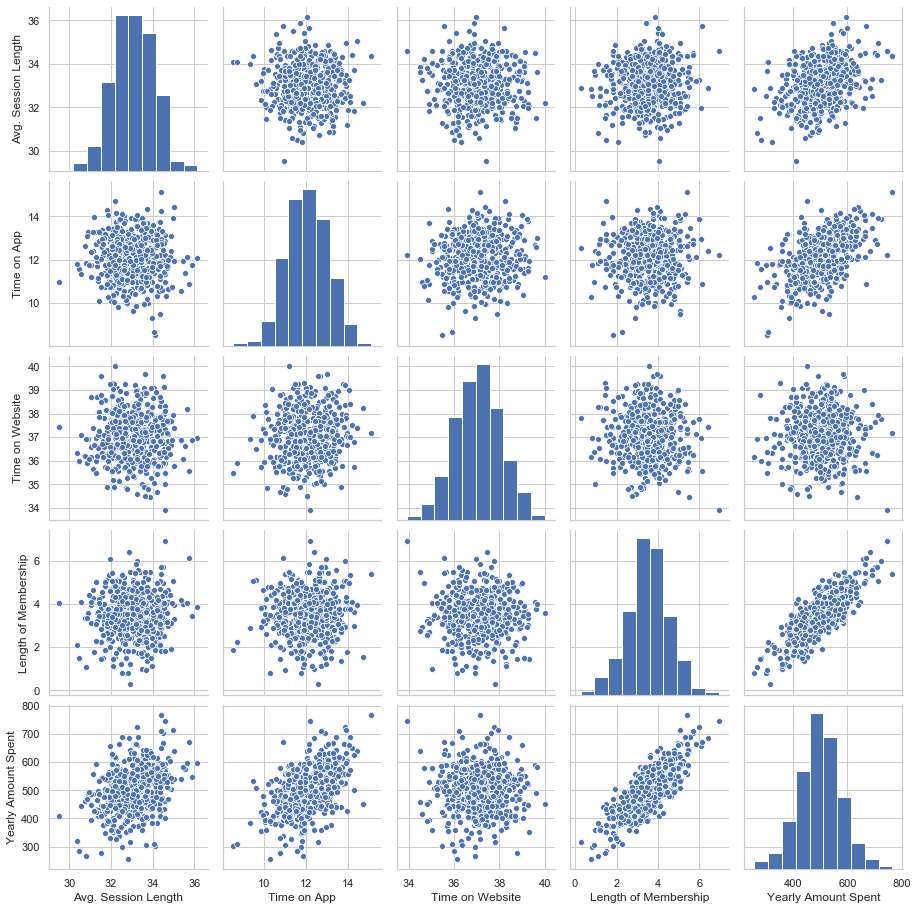

In [24]:
sns.pairplot(clientes)

** Baseado neste plot podemos ver que a característica mais correlacionada com o valor anual gasto (Yearly Amount Spent) é Length of Membership **

** Criando um plot de um modelo linear  da quantia anual gasta (Yearly Amount Spent) vs. tempo de associação (Length of Membership). **

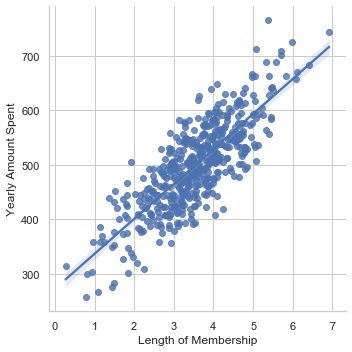

In [25]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=clientes)

## Treinando e testando os dados

Agora que exploramos um pouco os dados, vamos avançar e dividir os dados em conjuntos de treinamento e teste.

In [26]:
y = clientes['Yearly Amount Spent']

In [27]:
X= clientes[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train,y_test =train_test_split(X, y, test_size=0.2,random_state=42)

## Treinando o modelo

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Os coeficientes do modelo**

In [42]:
lm.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

## Previsão de dados de teste

In [43]:
prediction = lm.predict(X_test)

** Comparando os valores reais de teste em relação aos valores preditos. **

Text(0, 0.5, 'Predicted Y')

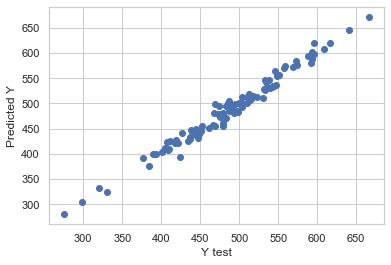

In [44]:
plt.scatter(y_test, prediction)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

## Avaliando o Modelo

In [47]:
from sklearn import metrics

print('Erro médio absoluto:          ', metrics.mean_absolute_error(y_test, prediction))
print('Erro médio quadrático:        ', metrics.mean_squared_error(y_test, prediction))
print('Raiz do erro médio quadrático:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Erro médio absoluto:           8.558441885315252
Erro médio quadrático:         109.86374118394055
Raiz do erro médio quadrático: 10.481590584636502


## Resíduos

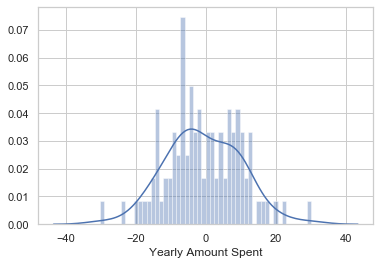

In [37]:
sns.distplot((y_test-prediction), bins=50)

** Os resíduos estão mais ou menos normalmente distribuidos **

## Conclusão
Ainda desejamos descobrir a resposta à pergunta original, concentramos-nos no desenvolvimento de aplicativos móveis ou de sites? Ou talvez isso realmente não importe, e o tempo como membro é o que é realmente importante? Vamos ver se podemos interpretar os coeficientes para ter uma idéia.

In [29]:
coef = pd.DataFrame(lm.coef_, X.columns, columns=['Coefs'])
coef

,Coefs
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** Como podemos interpretar esses coeficientes? **

O aumento de uma unidade de cada uma dessas características, corresponde ao aumento em dólares dos valores na coluna 'Coefs'. 

Em outras palavras, levando em consideração que:
   - Avg. Session Length: Tempo médio das sessões de consultoria de estilo na loja.
   - Time on App: tempo médio gasto no app em minutos.
   - Time on Website: tempo médio gasto no site em minutos.
   - Lenght of Membership: Há quantos anos o cliente é membro.

Temos que para o aumento de uma unidade do Tempo médio das sessões, temos um aumento de quase 26 dólares.
O aumento de um minuto gasto no app (Time on App) , temos um aumento de 38.59 dólares. E assim por diante.
 

## Pelos coeficientes, podemos concluir que é mais interessante investir no App do que no website já que dá muito mais retorno.